In [24]:
import pandas as pd

In [20]:
df1 = pd.read_excel('D:\Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('D:\Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2010-2011')


<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\darzu\AppData\Local\Temp\ipykernel_14348\1713999042.py:1: SyntaxWarning: invalid escape sequence '\B'
  df1 = pd.read_excel('D:\Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2009-2010')
C:\Users\darzu\AppData\Local\Temp\ipykernel_14348\1713999042.py:2: SyntaxWarning: invalid escape sequence '\B'
  df2 = pd.read_excel('D:\Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2010-2011')


In [25]:
df = pd.concat([df1, df2], ignore_index=True) # Concatenate the two DataFrames without resetting the index

In [26]:
print(df.shape)

print(df.columns)

(1067371, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [27]:
df.info() # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


## CLeaning and Feature Engineering

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [28]:
df = df.dropna(subset=['InvoiceDate' , 'Customer ID'])  # Drop rows where 'InvoiceDate' or 'Customer ID' is NaN

In [29]:
print(df.shape)

(824364, 8)


In [30]:
df = df[~df['Invoice'].astype(str).str.startswith('C')] # Remove rows where 'Invoice' starts with 'C' cancelled

In [31]:
print(df.shape)

(805620, 8)


In [32]:
df['Revenue'] = df['Quantity'] * df['Price']  # Create a new column 'Revenue' feature engineering

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert 'InvoiceDate' to datetime format

df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str) # (feature engineering)

In [33]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


## Visualizing The data Using Matplotlib

In [38]:
import matplotlib.pyplot as plt

In [34]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()

In [39]:
monthly_revenue

Month
2009-12     686654.160
2010-01     557319.062
2010-02     506371.066
2010-03     699608.991
2010-04     594609.192
2010-05     599985.790
2010-06     639066.580
2010-07     591636.740
2010-08     604242.650
2010-09     831615.001
2010-10    1036680.000
2010-11    1172336.042
2010-12     884591.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518210.790
Name: Revenue, dtype: float64

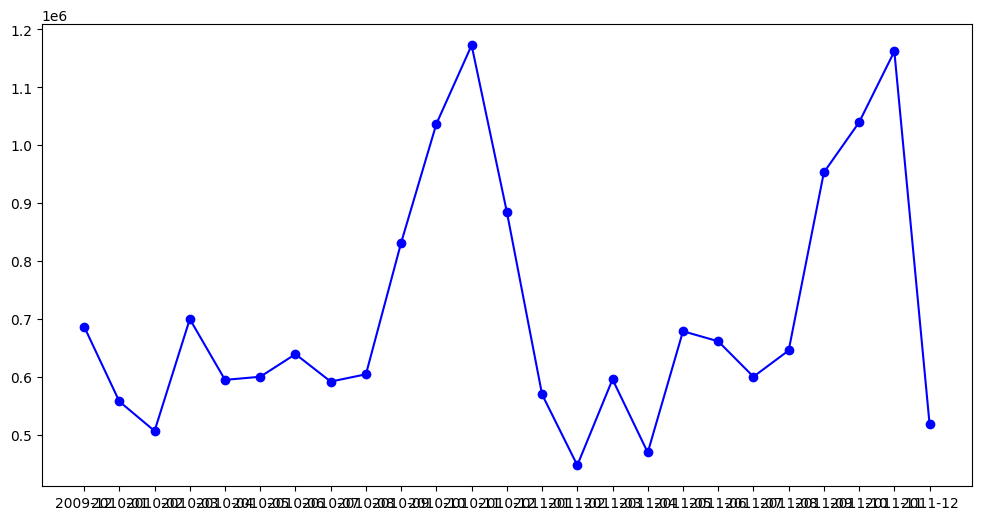

In [40]:
plt.figure(figsize=(12, 6))  # canvas for the plot

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='b')

plt.show()

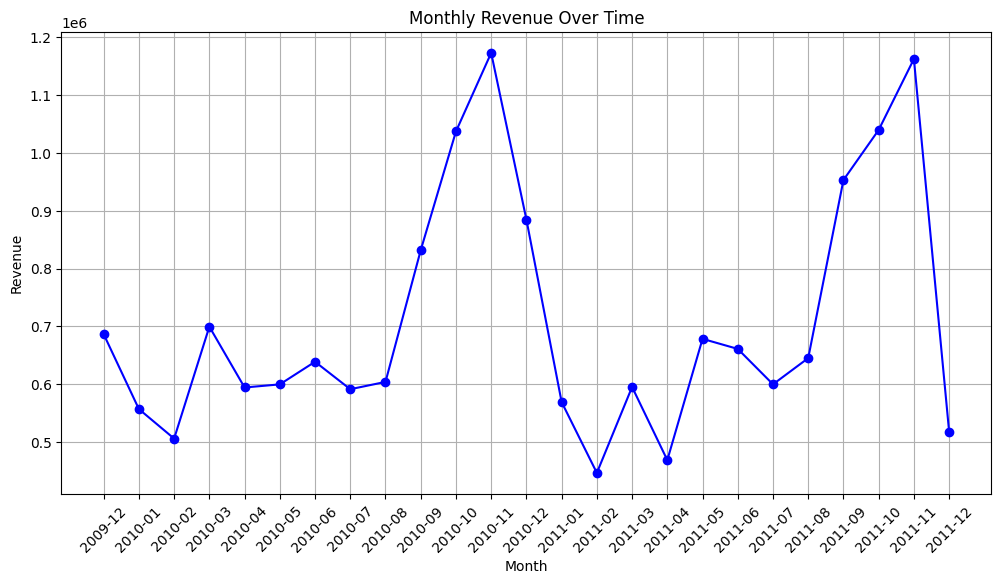

In [41]:
plt.figure(figsize=(12,6))

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

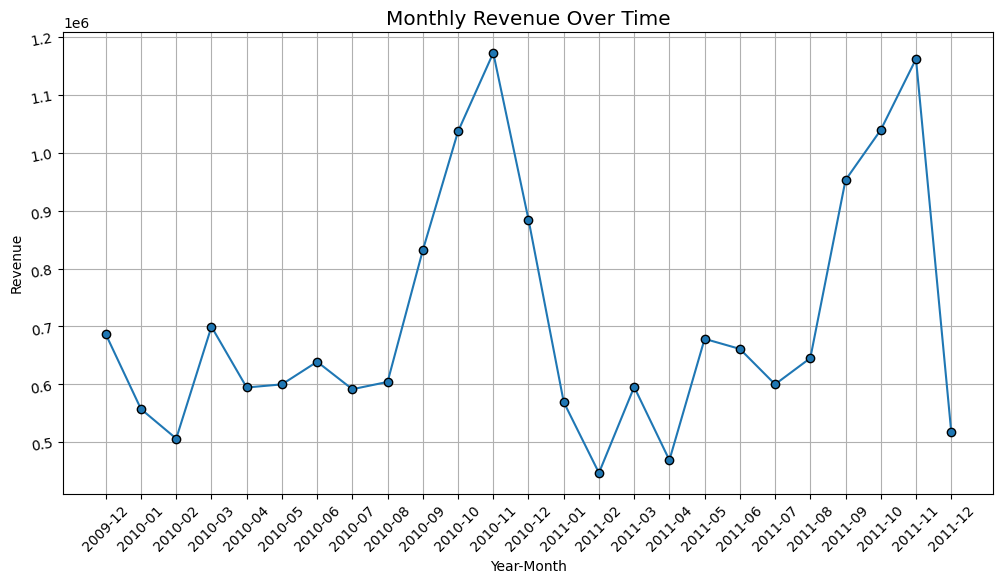

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.yticks(rotation=10)
plt.style.use('classic')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

In [43]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)


In [44]:
country_revenue # type: ignore

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

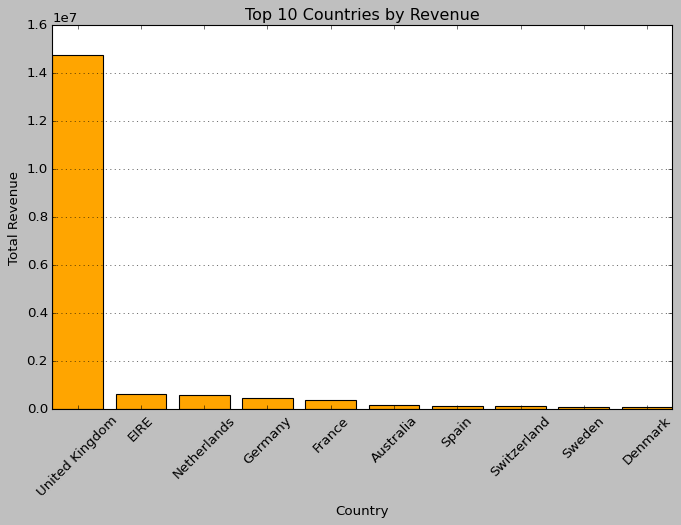

In [45]:

plt.figure(figsize=(10, 6))
plt.bar(country_revenue.index, country_revenue.values, color='orange')

# Customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Scatter plot

In [47]:
import random

random.seed(123)


print(random.randint(1, 100))

7


In [48]:
sample_df = df.sample(100,random_state = 1)

In [49]:
sample_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
327787,521375,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-09-05 11:58:00,1.65,12647.0,Germany,39.60,2010-09
361298,524354,82600,NO SINGING METAL SIGN,12,2010-09-28 16:50:00,2.10,17048.0,United Kingdom,25.20,2010-09
917933,570693,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2011-10-11 16:50:00,1.95,16161.0,United Kingdom,1.95,2011-10
354195,523864,21714,CITRONELLA CANDLE GARDEN POT,1,2010-09-24 12:24:00,1.25,15034.0,United Kingdom,1.25,2010-09
501355,536162,22087,PAPER BUNTING WHITE LACE,59,2010-11-30 12:07:00,2.90,15939.0,United Kingdom,171.10,2010-11
442982,531560,22470,HEART OF WICKER LARGE,2,2010-11-09 10:08:00,2.95,12748.0,United Kingdom,5.90,2010-11
853001,565675,82484,WOOD BLACK BOARD ANT WHITE FINISH,12,2011-09-06 09:51:00,6.75,15513.0,United Kingdom,81.00,2011-09
958955,573923,79321,CHILLI LIGHTS,2,2011-11-02 09:31:00,5.75,17965.0,United Kingdom,11.50,2011-11
213367,510069,22295,HEART FILIGREE DOVE LARGE,12,2010-05-27 11:09:00,1.65,16735.0,United Kingdom,19.80,2010-05
273976,516001,21390,FILIGRIS HEART WITH BUTTERFLY,48,2010-07-16 09:06:00,1.25,14852.0,United Kingdom,60.00,2010-07


In [51]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 327787 to 228245
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      100 non-null    object        
 1   StockCode    100 non-null    object        
 2   Description  100 non-null    object        
 3   Quantity     100 non-null    int64         
 4   InvoiceDate  100 non-null    datetime64[ns]
 5   Price        100 non-null    float64       
 6   Customer ID  100 non-null    float64       
 7   Country      100 non-null    object        
 8   Revenue      100 non-null    float64       
 9   Month        100 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 8.6+ KB


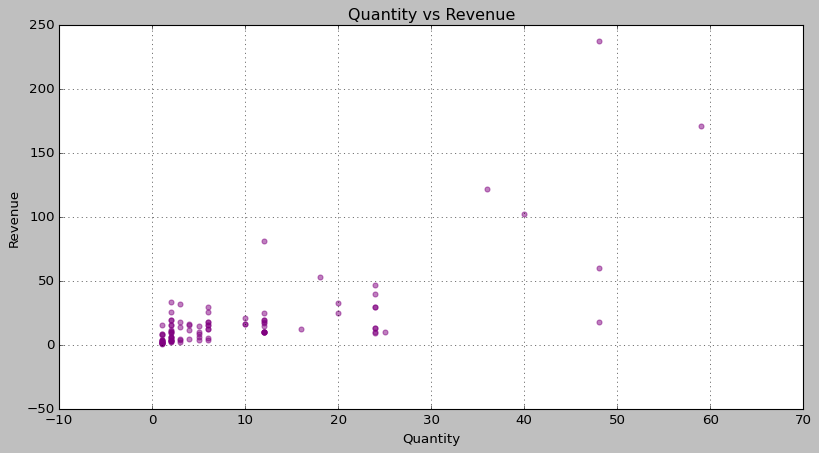

In [55]:
plt.figure(figsize=(12,6))   
plt.scatter(sample_df['Quantity'], sample_df['Revenue'], alpha = 0.5, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Quantity vs Revenue')
plt.grid(True)
plt.show()

## Multiple charts in one graph

In [56]:
monthly_quantity =df.groupby('Month')['Quantity'].sum().sort_index()

monthly_quantity.head(10)

Month
2009-12    400201
2010-01    370967
2010-02    372771
2010-03    503467
2010-04    352042
2010-05    386297
2010-06    391682
2010-07    325661
2010-08    453590
2010-09    569265
Name: Quantity, dtype: int64

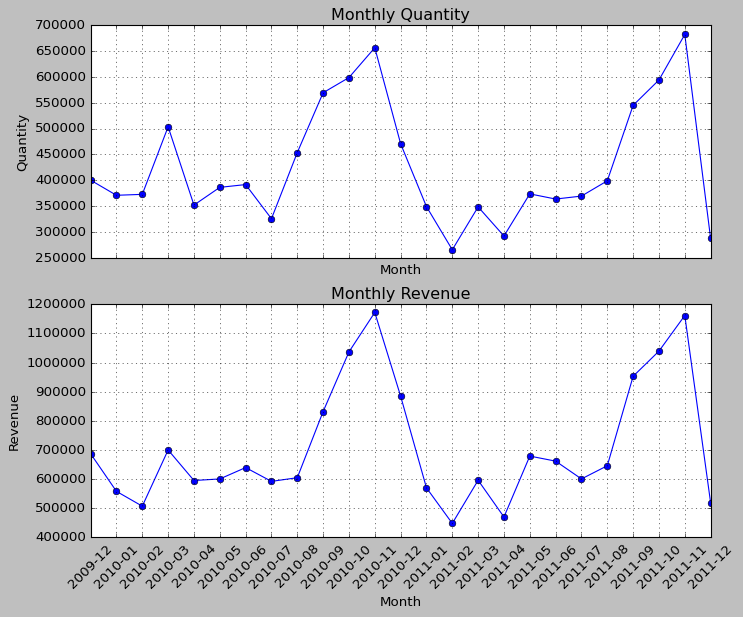

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axs[0].plot(monthly_quantity.index, monthly_quantity.values, marker='o', color='blue', label='Quantity')
axs[0].set_title("Monthly Quantity")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Quantity")
axs[0].grid(True)

axs[1].plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='blue', label='Revenue')
axs[1].set_title("Monthly Revenue")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Revenue")
axs[1].grid(True)

plt.xticks(rotation=45)
plt.show()